# Dominik Szot, 20.04.2023
# Laboratorium 06
# Kwadratury

# Zadanie 1

Import potrzebnych bibliotek

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp
import scipy.integrate as integrate
import matplotlib.ticker

Funkcja dzięki której będziemy obliczać przybliżona wartość PI

In [16]:
f_x = lambda x : 4./(1 + x**2)

Funkcja do obliczania kwadratur prostokątów

In [17]:
def rectangular_method(nodes, values) -> None:
    accumulated = 0.

    for i in range(1, len(nodes)):
        accumulated += (nodes[i] - nodes[i-1])*values[i]
    
    return accumulated

Funkcja obliczająca wartość całki

In [30]:
m = 26

a = 0
b = 1

# Tablica wartości błędów względnych
error_trapz = [np.double(0) for _ in range(m-1)]
error_simps = [np.double(0) for _ in range(m-1)]
error_rectangle = [np.double(0) for _ in range(m-1)]

for i in range(1, m):
    no_nodes = 2**i + 1
    
    # Rozmieszczanie 2**i + 1 równoodległych węzłów
    quadrature_nodes = np.array([np.double(a) + np.double(i) * np.double((b-a))/(no_nodes-1) for i in range(no_nodes)])
    quadrature_points = [f_x(i) for i in quadrature_nodes]

    # Rozwiazywanie całki
    result_trapz = integrate.trapezoid(quadrature_points, quadrature_nodes, 1)
    result_simps = integrate.simpson(quadrature_points, quadrature_nodes, 1)
    result_rectangle = rectangular_method(quadrature_nodes, quadrature_points);

    error_trapz[i-1]=(np.abs((np.pi - result_trapz)/np.pi))
    error_simps[i-1]=(np.abs((np.pi - result_simps)/np.pi))
    error_rectangle[i-1]=(np.abs((np.pi - result_rectangle)/np.pi))

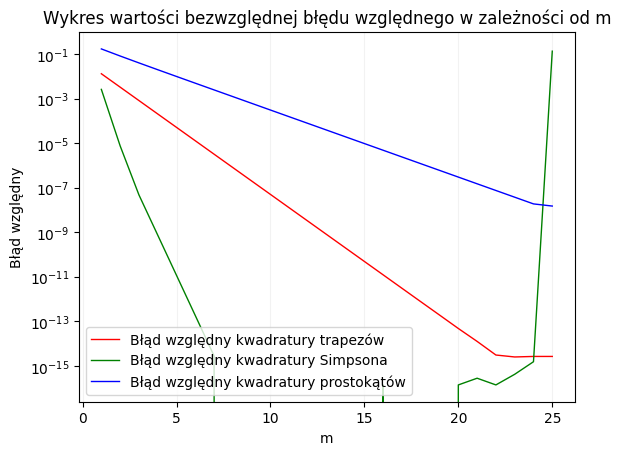

In [29]:
x_no_points = [i for i in range(1, m)]

plt.semilogy(x_no_points, error_trapz, linewidth=1,  color="red", label="Błąd względny kwadratury trapezów")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())

plt.semilogy(x_no_points, error_simps, linewidth=1,  color="green", label="Błąd względny kwadratury Simpsona")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())

plt.semilogy(x_no_points, error_rectangle, linewidth=1,  color="blue", label="Błąd względny kwadratury prostokątów")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.grid(axis='x', color='0.95')


plt.title("Wykres wartości bezwzględnej błędu względnego w zależności od m")
plt.xlabel("m")
plt.ylabel("Błąd względny")
plt.legend()
plt.show()

In [26]:
h_min_t = 0
h_min_r = 0
h_min_s = 0

for i in range(1, len(error_trapz)):
    if error_trapz[i] < error_trapz[i-1] and error_trapz[i-1] > 0:
        h_min_t = error_trapz[i-1]
    else:
        break

for i in range(1, len(error_trapz)):
    if error_trapz[i] < error_rectangle[i-1] and error_rectangle[i-1] > 0:
        h_min_r = error_rectangle[i-1]
    else:
        break

for i in range(1, len(error_trapz)):
    if error_simps[i] < error_simps[i-1] and error_simps[i-1] > 0:
        h_min_s = error_simps[i-1]
    else:
        break

d = pd.Series([h_min_t, h_min_r, h_min_s], index=["K. Trapezów","K. Prostokątów", "K. Simpsona"])
print(d)


K. Trapezów       3.109876e-15
K. Prostokątów    1.897257e-08
K. Simpsona       2.827160e-15
dtype: float64


Przy obliczaniu całki korzystając z kwadratur prostokątów i Simpsona <br> 
jesteśmy w stanie wyznaczyć wartość $h_{min}$ wynoszącą odpowiednio <br>
K. Trapezów       3.109876e-15  <br>
K. Prostokątów    1.897257e-08  <br>
K. Simpsona       2.827160e-15  <br>

Należy wspomnieć że w programie korzystam z typu np.double posiadającego podwójna precyzję.

In [21]:
def machineEpsilon(func=float):
    machine_epsilon = func(1)
    while func(1)+func(machine_epsilon) != func(1):
        machine_epsilon_last = machine_epsilon
        machine_epsilon = func(machine_epsilon) / func(2)
    return machine_epsilon_last

print("Eps. maszynowy dla np.double: ", machineEpsilon(np.double))

Eps. maszynowy dla np.double:  2.220446049250313e-16


Wartości Epsilona Maszynowego wyliczone używając funkcji z laboratorium 01 <br> 
są zbliżone do wartości $h_{min}$ dla kwadratur Simpsona i Trapezów.<br>

Oznacza to że dla tych kwadratur zbliżyliśmy się do maksymalnej precycji obliczeń całki 
dla typu double z podwójną precycją (float64). 

Dla kwadratur prostokątów błąd metody przeważa nad <br> 
błędem numerycznym dla 1 <= m <= 25 , więc nie jesteśmy w stanie porównać <br>
wartości $h_{min}$ oraz Epilona Maszynowego. 

# Zadanie 2

In [22]:
f_x_2 = lambda x : np.double(4)/(1 + x**2)

Aby obliczyć wartość całki metodą Gaussa-Legendre'a skorzystałem z funkcji leggauss z biblioteki numpy.<br>

In [48]:
def gauss_l(f_x_2, a, b, n):
    l, c = np.polynomial.legendre.leggauss(n)
    
    l = (b-a)/2 * l + (b+a)/2
    c = (b-a)/2 * c

    return np.double(np.sum(c * f_x_2(l), dtype=np.float64))

Obliczam wartości całki oraz wartość bezwzględna błedu względnego.

In [49]:
f_2_values = np.array([gauss_l(f_x_2, np.double(0), np.double(1), i) for i in range(1,m+2)], dtype=np.float64)
gauss_l_errors = [np.abs((np.pi - f_2_values[i])/np.pi) for i in range(1, m+1)]

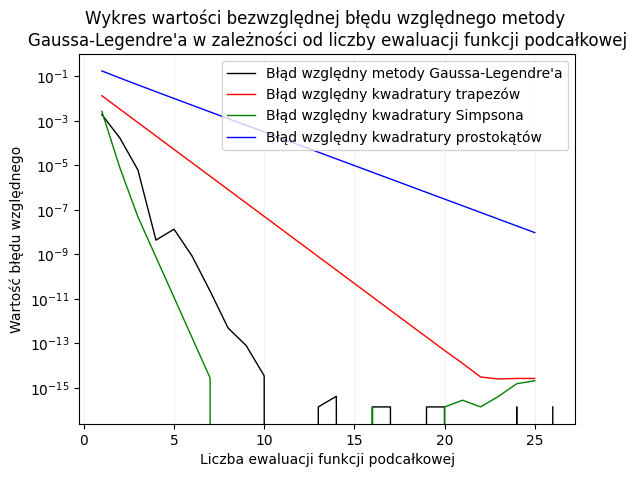

In [50]:
plt.semilogy([i for i in range(1, m+1)], gauss_l_errors, linewidth=1,  color="black", label="Błąd względny metody Gaussa-Legendre'a")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.grid(axis='x', color='0.95')

plt.title("Wykres błędów metod przybliżających wartości całki")
plt.xlabel("Liczba ewaluacji funkcji podcałkowej/liczba węzłów")
plt.ylabel("Wartość błędu względnego")

plt.semilogy(x_no_points, error_trapz, linewidth=1,  color="red", label="Błąd względny kwadratury trapezów")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())

plt.semilogy(x_no_points, error_simps, linewidth=1,  color="green", label="Błąd względny kwadratury Simpsona")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())

plt.semilogy(x_no_points, error_rectangle, linewidth=1,  color="blue", label="Błąd względny kwadratury prostokątów")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.grid(axis='x', color='0.95')

plt.legend()
plt.show()


Wartości błędu względnego maleją prawie zawsze dla 0 < n < 10. Dla n > 10 
<br> błąd numeryczny zaczyna dominować nad błędem metody.

In [ ]:
plt.semilogy([i for i in range(1, m+1)], gauss_l_errors, linewidth=1,  color="black", label="Błąd względny metody Gaussa-Legendre'a")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.grid(axis='x', color='0.95')
plt.title("Wykres wartości bezwzględnej błędu względnego metody \nGaussa-Legendre'a w zależności od liczby ewaluacji funkcji podcałkowej")
plt.xlabel("Liczba ewaluacji funkcji podcałkowej")
plt.ylabel("Wartość błędu względnego")

plt.legend()
plt.show()
